In [1]:
!pip install --quiet numpy
!pip install --quiet pandas
!pip install --quiet pandas_datareader
!pip install --quiet keras
!pip install --quiet tensorflow
!pip install --quiet streamlit
!pip install --quiet plotly
!pip install --quiet scikit-learn
!pip install --quiet matplotlib

In [30]:
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

end = (dt.datetime.now() - dt.timedelta(days=2)).date()
start = end - dt.timedelta(days=15*365.25)
df = web.DataReader('GOOGL', 'stooq', start, end)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2023-09-29,133.28,134.0500,130.36,130.860,30859790.0
2023-09-28,129.84,133.3000,129.79,132.310,22513132.0
2023-09-27,128.57,130.8950,128.57,130.540,22746452.0
2023-09-26,129.77,130.3645,127.22,128.565,25718704.0
2023-09-25,129.83,131.1700,128.96,131.110,20094643.0


In [31]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2008-10-07,9.3330,9.3745,8.6340,8.650,442176000.0
2008-10-06,9.3495,9.4000,8.9290,9.280,448824000.0
2008-10-03,9.9340,10.3125,9.5770,9.673,319716000.0
2008-10-02,10.2450,10.2495,9.6500,9.762,239396000.0
2008-10-01,10.2790,10.4245,10.0775,10.293,249392000.0


In [32]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-09-29,133.28,134.0500,130.36,130.860,30859790.0
1,2023-09-28,129.84,133.3000,129.79,132.310,22513132.0
2,2023-09-27,128.57,130.8950,128.57,130.540,22746452.0
3,2023-09-26,129.77,130.3645,127.22,128.565,25718704.0
4,2023-09-25,129.83,131.1700,128.96,131.110,20094643.0


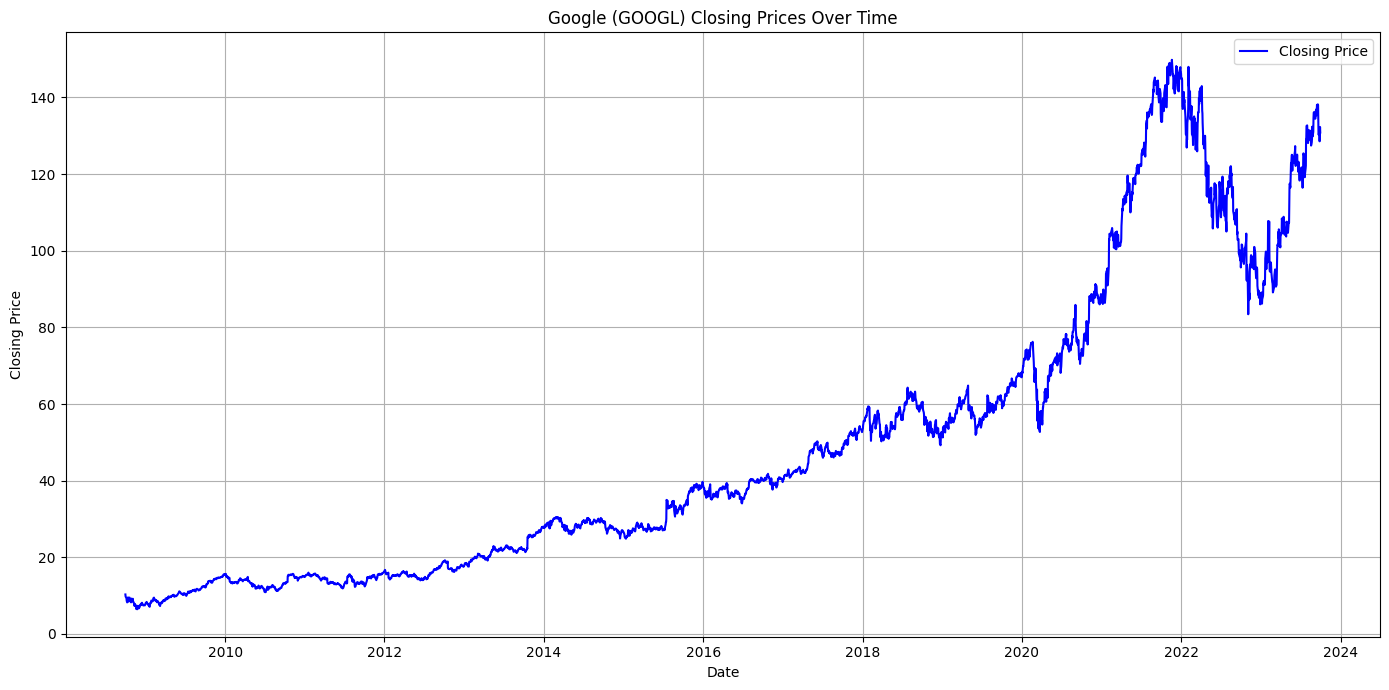

In [33]:
# Plotting the data
plt.figure(figsize=(14,7))
plt.plot(df.Date, df.Close, label='Closing Price', color='blue')
plt.title('Google (GOOGL) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3770    8.109635
3771    8.120645
3772    8.132875
3773    8.146200
3774    8.163720
Name: Close, Length: 3775, dtype: float64

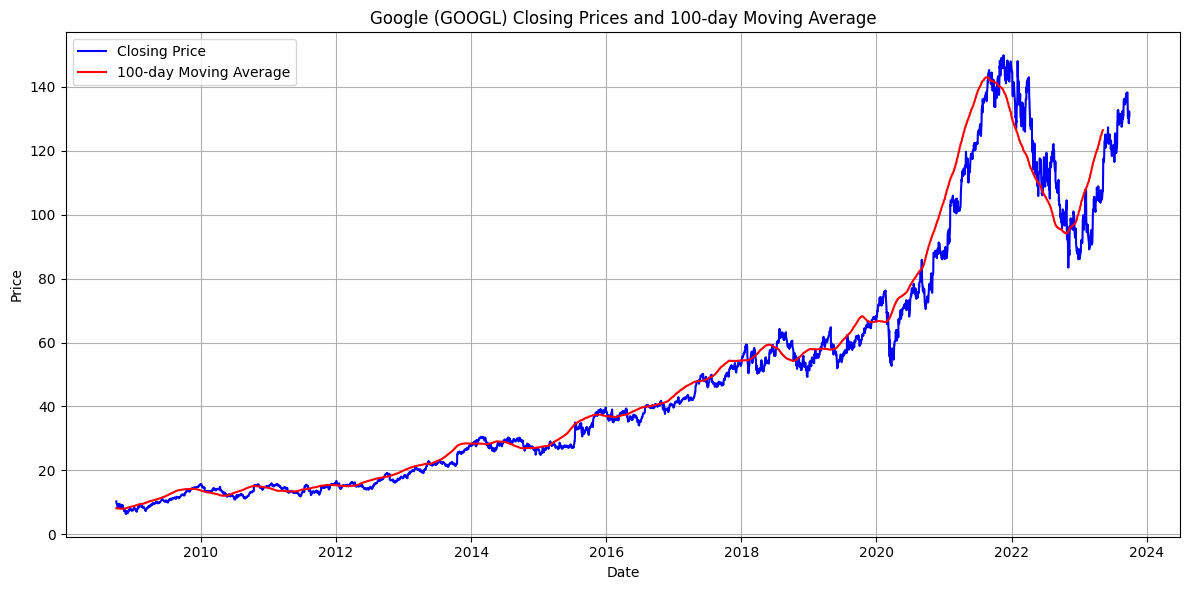

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.Date, df.Close, label='Closing Price', color='blue')
plt.plot(df.Date, ma100, label='100-day Moving Average', color='red')
plt.title('Google (GOOGL) Closing Prices and 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3770    8.917602
3771    8.909335
3772    8.904240
3773    8.899563
3774    8.897258
Name: Close, Length: 3775, dtype: float64

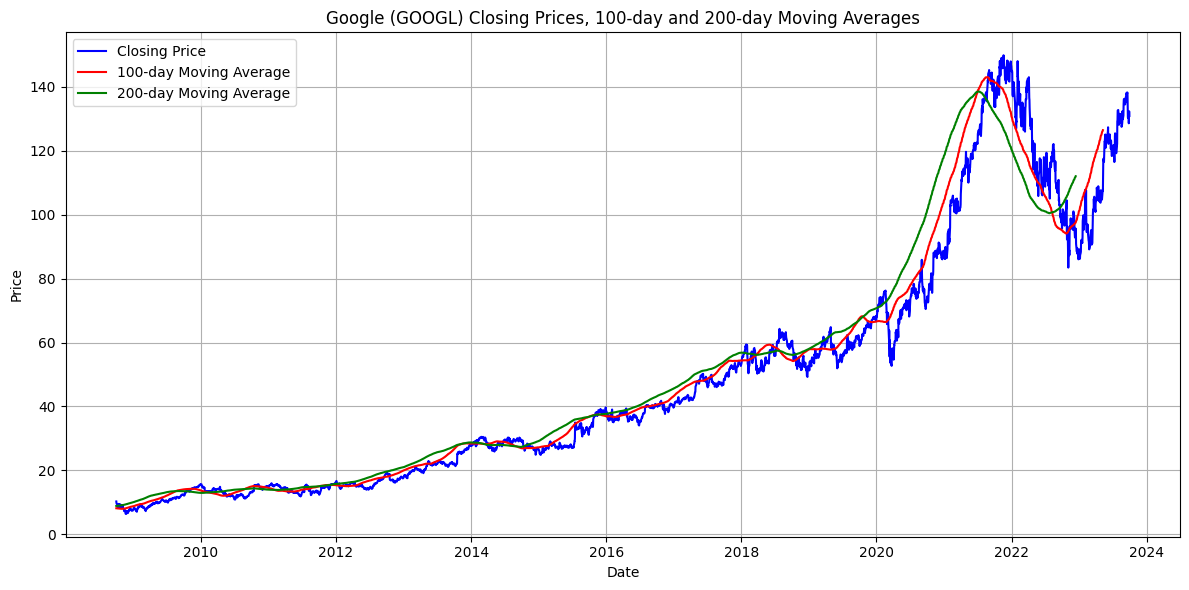

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df.Date, df.Close, label='Closing Price', color='blue')
plt.plot(df.Date, ma100, 'r', label='100-day Moving Average')
plt.plot(df.Date, ma200, 'g', label='200-day Moving Average')
plt.title('Google (GOOGL) Closing Prices, 100-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_train_date = pd.DataFrame(df['Date'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
data_test_date = pd.DataFrame(df['Date'][int(len(df)*0.7):int(len(df))])
print(data_train.shape, data_test.shape)
data_test.head()

(2642, 1) (1133, 1)


,Close
2642,20.1550
2643,20.3260
2644,20.0300
2645,19.8550
2646,20.0665


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_train)

MinMaxScaler()

In [40]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[0.85478614],
       [0.86588109],
       [0.85233759],
       ...,
       [0.00170633],
       [0.00327493],
       [0.00557809]])

In [41]:
x_train = []
y_train = []

for i in range(100,data_train_arr.size):
  x_train.append(data_train_arr[i-100:i])
  y_train.append(data_train_arr[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape,y_train.shape

((2542, 100, 1), (2542,))

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [317]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with Dropout
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer with Dropout
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)


Epoch 1/100


In [288]:
model.save('keras_model.h5')

/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [289]:
data_test.head()
print(data_test)

        Close
2642  20.1550
2643  20.3260
2644  20.0300
2645  19.8550
2646  20.0665
...       ...
3770   8.6500
3771   9.2800
3772   9.6730
3773   9.7620
3774  10.2930

[1133 rows x 1 columns]


In [290]:
past_100_days = data_train.tail(100)
print(past_100_days)

        Close
2542  21.7550
2543  21.8430
2544  21.7330
2545  21.6355
2546  21.6410
...       ...
2637  19.7545
2638  19.4410
2639  19.3710
2640  19.5760
2641  19.8770

[100 rows x 1 columns]


In [291]:
print(pd.__version__)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

2.1.1


In [292]:
final_df.head()

,Close
0,21.7550
1,21.8430
2,21.7330
3,21.6355
4,21.6410


In [293]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.91835022],
       [0.92362568],
       [0.91703135],
       ...,
       [0.19405311],
       [0.19938853],
       [0.23122115]])

In [294]:
input_data.shape

(1233, 1)

In [295]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

# Convert lists to NumPy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape x_test to have a third dimension
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [296]:
x_test.shape, y_test.shape

((1133, 100, 1), (1133,))

In [297]:
y_predicted = model.predict(x_test)
y_predicted.shape

36/36 [==============================] - 2s 35ms/step


(1133, 1)

In [298]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [301]:
# Apply inverse scaling
# Apply inverse scaling
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()

# Print out the Zfirst few values to verify
print("First few values of y_test:")
print(y_test[:10])  # prints the first 10 values

print("\nFirst few values of y_predicted:")
print(y_predicted[:10])  # prints the first 10 values

First few values of y_test:
[3931.18570116 3978.76743629 3896.40373103 3847.70897286 3906.56006631
 3974.45447199 3955.1156966  3959.84604454 3966.38505493 3990.45417825]

First few values of y_predicted:
[3893.668  3958.3179 4006.6172 3986.0974 3946.4712 3959.1233 4009.6863
 4028.9216 4032.6074 4035.209 ]


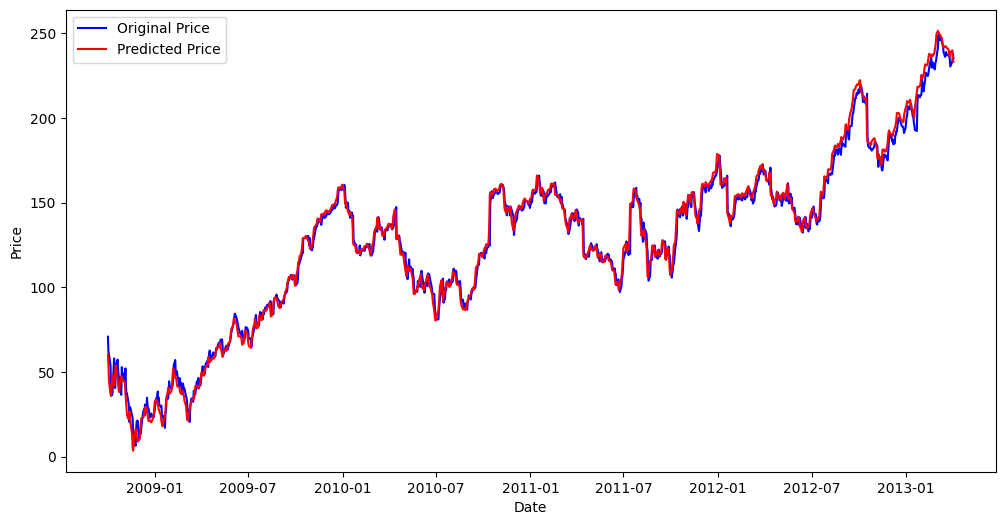

In [300]:
plt.figure(figsize=(12,6))
plt.plot(data_test_date,y_test,'b',label='Original Price')
plt.plot(data_test_date,y_predicted,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [284]:
print("Original Prices:")
for date, price in zip(data_test_date.values, y_test):
    print(f"Date: {date[0]}, Price: {price:.2f}")

Original Prices:
Date: 2013-04-03T00:00:00.000000000, Price: 235.28
Date: 2013-04-02T00:00:00.000000000, Price: 238.14
Date: 2013-04-01T00:00:00.000000000, Price: 233.20
Date: 2013-03-28T00:00:00.000000000, Price: 230.28
Date: 2013-03-27T00:00:00.000000000, Price: 233.81
Date: 2013-03-26T00:00:00.000000000, Price: 237.88
Date: 2013-03-25T00:00:00.000000000, Price: 236.72
Date: 2013-03-22T00:00:00.000000000, Price: 237.00
Date: 2013-03-21T00:00:00.000000000, Price: 237.39
Date: 2013-03-20T00:00:00.000000000, Price: 238.84
Date: 2013-03-19T00:00:00.000000000, Price: 237.42
Date: 2013-03-18T00:00:00.000000000, Price: 235.95
Date: 2013-03-15T00:00:00.000000000, Price: 238.66
Date: 2013-03-14T00:00:00.000000000, Price: 241.68
Date: 2013-03-13T00:00:00.000000000, Price: 243.26
Date: 2013-03-12T00:00:00.000000000, Price: 244.21
Date: 2013-03-11T00:00:00.000000000, Price: 247.22
Date: 2013-03-08T00:00:00.000000000, Price: 245.84
Date: 2013-03-07T00:00:00.000000000, Price: 246.29
Date: 2013-03-

In [285]:
print("Predicted Prices:")
for date, price in zip(data_test_date.values, y_predicted):
    print(f"Date: {date[0]}, Predicted Price: {price[0]:.2f}")

Predicted Prices:


IndexError: invalid index to scalar variable.

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_predicted)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate MSE
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 12.52
Mean Squared Error (MSE): 200.23
Root Mean Squared Error (RMSE): 14.15
